In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import os

# NEK5000 Python libraries
from pymech.neksuite import readnek
import pymech.dataset

In [12]:
# Project name
project = 'eddy_uv'
# Define directory name
dirname = '/Users/gabriel/Nek5000/run/{0}'.format(project)
# Trial file
files = [os.path.join(dirname, file) for file in os.listdir(dirname) if '.f0' in file]
# Open dataset
ds = pymech.dataset.open_mfdataset(files)
# Sort by time
if 'time' in ds.dims:
    ds = ds.sel(z=0).sortby('time')
# Generate velocity magnitude
if 'ux' in ds.data_vars and 'uy' in ds.data_vars:
    ds['U'] = np.sqrt(ds['ux']**2 + ds['uy']**2)

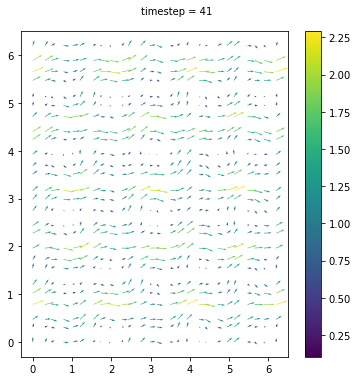

In [17]:
animate(ds, project_name=project, visualization_type='quiver')

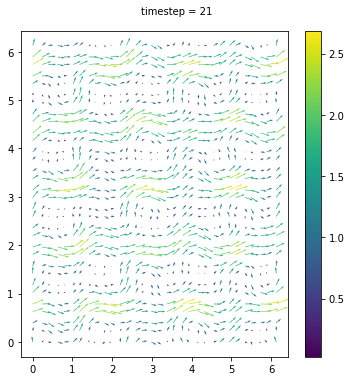

In [7]:
values = ds['U'].isel(time=5).values
skip = 4

ims = []

fig, ax = plt.subplots(figsize=(6, 6))
for t in np.arange(0, len(ds['time'])-20):
    im = ax.quiver(ds['x'][::skip], ds['y'][::skip], 
                   ds['ux'].isel(time=t)[::skip, ::skip], ds['uy'].isel(time=t)[::skip, ::skip],
                   ds['U'].isel(time=t)[::skip, ::skip],
                   scale=50)
    # im = ax.contourf(ds['x'], ds['y'], ds['U'].isel(time=t))
    title = 'timestep = {0}'.format(t)
    text = ax.annotate(title, xy=(0.45, 1.05), xycoords='axes fraction')
    ims.append([im] + [text])
colorbar = fig.colorbar(im)

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)
ani.save('{0}.gif'.format(project))

In [14]:
def animate(ds, project_name=None, param='ux', visualization_type='contour', filename=None):
    ''' Method to animate parts of a simulation for a given parameter. '''
    
    # Initialize list to hold image frames for future concatenation
    ims = []
    # Initialize figure
    fig, ax = plt.subplots(figsize=(6, 6))
    # Iterate over all timesteps in the provided dataset
    for t in np.arange(0, len(ds['time'])):
        title = 'timestep = {0}'.format(t)
        text = ax.annotate(title, xy=(0.45, 1.05), xycoords='axes fraction')
        if visualization_type == 'quiver':
            # Skip every n values to de-clutter the quiver field
            skip = 5
            # Plot the quiver field
            im = ax.quiver(ds['x'][::skip], ds['y'][::skip], 
                           ds['ux'].isel(time=t)[::skip, ::skip], ds['uy'].isel(time=t)[::skip, ::skip],
                           ds['U'].isel(time=t)[::skip, ::skip],
                           scale=50)
            # Add the image and text to the list of frames
            ims.append([im] + [text])
        # Default visualization type is a contour
        else:
            im = ax.contourf(ds['x'], ds['y'], ds['U'].isel(time=t))
            # Generaet contour iamge collections
            cs = im.collections
            # Add the image and text to the list of frames
            ims.append(cs + [text])
    # Generate colorbar    
    colorbar = fig.colorbar(im)
    # Generate animation
    ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=1000)
    # Save to filename
    if filename:
        ani.save('animations/{0}.gif'.format(filename))
    else:
        ani.save('animations/{0}.gif'.format(project))